# 3.2: Hierarchical clustering

### 3.2.1 Show a low level dendrogram containing 5 instances of each digit ( one person ).


### RELOAD window: CTRL+SHIFT+P


## LINKS 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html?highlight=agglomerative%20clustering#sklearn.cluster.AgglomerativeClustering

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import pandas as pd
from typing import List
import sys
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist


sys.path.insert(0, '/home/agervig/git/sm_pca')

from utils import data_utils
from utils import vis_utils

In [2]:
data_csv = pd.read_csv("../data_proc.csv", header=None)
data = pd.DataFrame.to_numpy(data_csv)
data = np.delete(data, 0, 1)
np.random.shuffle(data)


#X_train, Y_train, X_test, Y_test = data_utils.split_data_all(data, 0.8)

In [3]:
def get_data_student_cifers(data: np.array, student_id: int, cifers: List, instances: int):
    """
    data: np.ndarray -> image data incl. studnet id (col 0) and labels (col 1)
    student_id: int -> the student id of the student you want the data from 
    cifers: List -> A list of the cifers of interrest, to extract from the data of the student. EX: [0,4,7] will give you cifers 0, 4, 7
    instances: int -> how many instances of each cifer to return 
    """

    data_cifers = []
    data_student = data[data[:,0] == student_id]
    for c in cifers:
        data_cifers.extend(data_student[data_student[:,1] == c][0:instances])
    data_cifers = np.array(data_cifers)
    return data_cifers

In [4]:
#Extracting data for one random student from the dataset
data_student = get_data_student_cifers(data, 1, [0,1,2,3,4,5,6,7,8,9], 5)
cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward')
cluster.fit_predict(data_student[:,2:])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0])

In [5]:
Z = shc.linkage(data_student[:,2:], 'ward')
#This returns a metric c that tells how well the clusters represent the data, wher 1 is a perfekt fit
c, coph_dist = shc.cophenet(Z, pdist(data_student[:,2:]))
print(c)
print(Z[:])


0.5051287858769538
[[5.00000000e+00 6.00000000e+00 6.40536494e+02 2.00000000e+00]
 [2.10000000e+01 2.20000000e+01 1.16635115e+03 2.00000000e+00]
 [9.00000000e+00 5.00000000e+01 1.21561274e+03 3.00000000e+00]
 [3.50000000e+01 3.70000000e+01 1.22111629e+03 2.00000000e+00]
 [4.10000000e+01 4.20000000e+01 1.40088008e+03 2.00000000e+00]
 [4.50000000e+01 4.70000000e+01 1.40999007e+03 2.00000000e+00]
 [2.00000000e+01 2.40000000e+01 1.42668777e+03 2.00000000e+00]
 [7.00000000e+00 5.20000000e+01 1.44223288e+03 4.00000000e+00]
 [1.80000000e+01 2.60000000e+01 1.49001174e+03 2.00000000e+00]
 [8.00000000e+00 5.70000000e+01 1.50492279e+03 5.00000000e+00]
 [4.30000000e+01 4.40000000e+01 1.54225355e+03 2.00000000e+00]
 [3.60000000e+01 3.90000000e+01 1.55668590e+03 2.00000000e+00]
 [1.60000000e+01 5.80000000e+01 1.59376608e+03 3.00000000e+00]
 [1.30000000e+01 4.00000000e+01 1.60454729e+03 2.00000000e+00]
 [1.00000000e+00 3.30000000e+01 1.64056819e+03 2.00000000e+00]
 [1.10000000e+01 1.40000000e+01 1.65

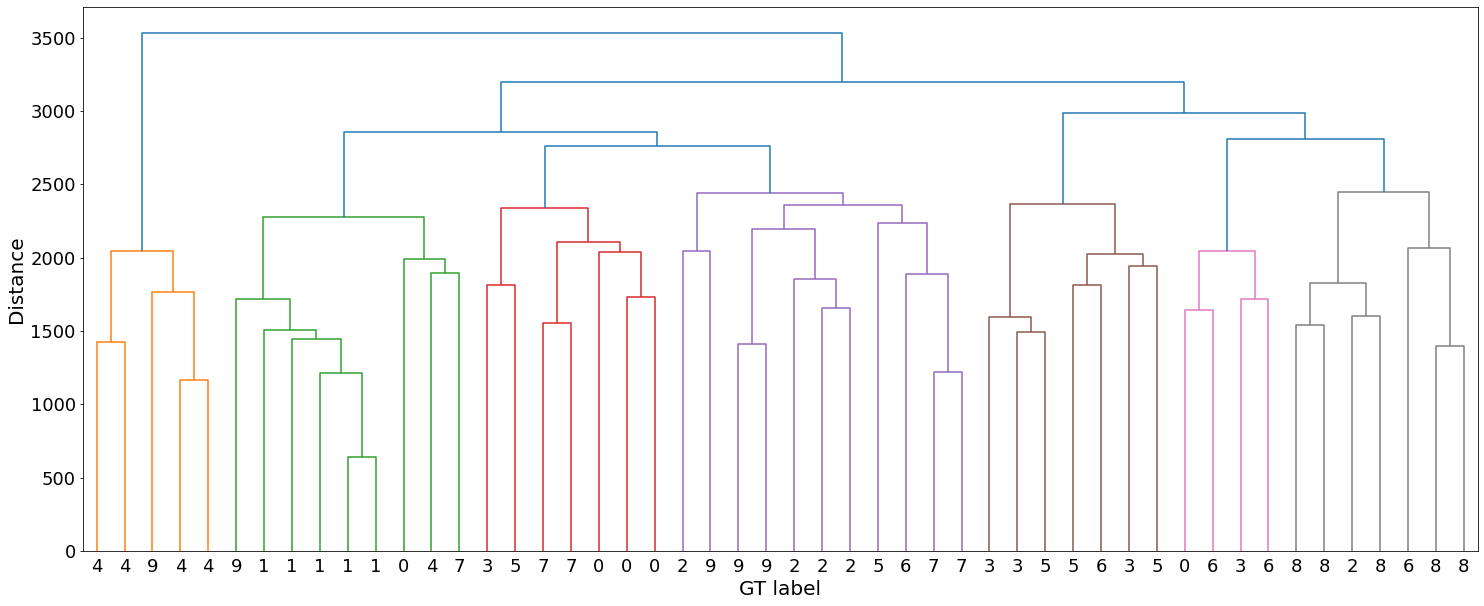

In [6]:
plt.figure(figsize=(25,10))
#plt.title("Hierarchical Clustering Dendrogram", fontsize = 20)
plt.xlabel("GT label", fontsize=20)
plt.ylabel("Distance", fontsize=20)
plt.yticks(fontsize=18)

dendrogram(Z, leaf_rotation=0., leaf_font_size=18., color_threshold=max(Z[:,2])*0.7, labels=data_student[:,1])
plt.show()

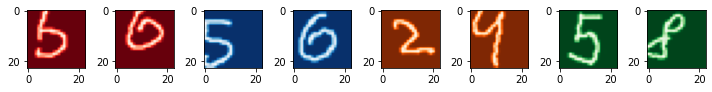

In [7]:
#Visualizing some of the wrong clusters (idx: (26,33) (27,31) (14, 46) (29, 42) (0 ,30) )
data_student[[26,33]]
vis_data = data_student[[26,33,27,31,14,46,29,42]]
student_id = data_student[[26,33],[0]]
label = data_student[[26,33],[1]]
vis_data = np.delete(vis_data, 0, 1)
vis_data = np.delete(vis_data, 0, 1)

colormaps = ["Reds", "Reds", "Blues", "Blues", "Oranges", "Oranges", "Greens", "Greens"]
fig = plt.figure(figsize=(10,5))
num_img = vis_data.shape[0]
img_rows = int(np.sqrt(len(vis_data[0])))
img_cols = img_rows
for i in range(1, num_img + 1):
    ax = fig.add_subplot(1, 8, i)
    plt.imshow(vis_data[i-1].reshape(img_rows, img_cols), cmap = colormaps[i-1])
    plt.tight_layout()
plt.show()

### 3.2.2 Use K-Means clustering to compress each digit into 5 clusters, as done in 3.1.1, and perform hierarchical clustering to show a low level dendrogram of this (one person).


In [44]:
#Extracting data for two students and splitting into each cifer 
num_digit = 10
clusters = np.empty([50,300])

for i in range(num_digit): 
    temp_data = get_data_student_cifers(data, 1, [i], 200)
    kmeans = KMeans(n_clusters=5).fit(temp_data[:,2:])
    label = [i] * 5
    cluster_centers = kmeans.cluster_centers_
    clusters[1:,i:i+5] = cluster_centers
    clusters[0:,i:i+5] = label
    



clusters = np.array(clusters)
#USE THE CLUSTER CENTERS TO COMPUTE THE DENGDROGRAM
print(clusters.shape)

ValueError: could not broadcast input array from shape (5,529) into shape (49,5)

In [33]:
clusters = clusters.reshape(50,529)
print(clusters)
#vis_utils.visualize_generic(clusters[0:10], 2, 5, " ", "12345678910")

ValueError: cannot reshape array of size 20 into shape (50,529)

### 3.2.3 Discuss the results and relate them to the cross validation tables from k-NN classification

In [ ]:
#lool at confusion matrix of cross val and compare to hierarchical clustering 

